# **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import nltk
import spacy
import string
from matplotlib.pyplot import imread
from wordcloud import WordCloud,STOPWORDS
import warnings
warnings.filterwarnings('ignore')

In [2]:
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# **Import DataSet**

In [3]:
#import dataset which we extracted from resume dataset files
resume=pd.read_csv('RAW_RESUME_DATA.csv')
resume

Category                                            Resumes
0   PeopleSoft  Hari Narayana \t\t              \n\n\t\n\n\n\n...
1   PeopleSoft  C O N T A C T :\n\n\n\nAddress: Manyata Tech P...
2   PeopleSoft  Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...
3   PeopleSoft  PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...
4   PeopleSoft  SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...
..         ...                                                ...
74     Workday  Name\t: Naresh Babu Cherukuri\n\n\n\nObjective...
75     Workday  Punugoti Swetha\n\nWorkday Technical Consultan...
76     Workday  Shireesh Balasani                             ...
77     Workday  Workday Integration Consultant\n\n\n\nName    ...
78     Workday  Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...

[79 rows x 2 columns]

In [4]:
resume_df=resume.copy()

In [5]:
resume[resume['Category']=='SQL Developer']

Category                                            Resumes
44  SQL Developer  ANIL KUMAR MADDUKURI  \t\t\n\nSQL & MSBI Devel...
45  SQL Developer  resume\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\t\t\tRama...
46  SQL Developer  SQL AND MSBI DEVELOPER\n\nSQL AND MSBI DEVELOP...
47  SQL Developer  RAJU PAVANA KUMARI\n\n\n\n\t\n\n\tProfessional...
48  SQL Developer  Name: Ramesh\n\n\t\n\n\tCareer Objective: \n\n...
49  SQL Developer  BUDDHA VAMSI                                  ...
50  SQL Developer  SQL DEVELOPER\n\nName: -   Bandi prem sai\n\n\...
51  SQL Developer  Resume\n\nName     :  Neeraj Mishra\n\n\n\nExp...
52  SQL Developer  SQL SERVER DEVELOPER\n\n\n\n\n\nP. Syam Kumar ...
53  SQL Developer  Aradhana Tripathi\n\n\n\nCurrent Location: Gac...
54  SQL Developer  KAMBALLA PRADEEP                              ...
55  SQL Developer   Hyderabad\n\n\nNazeer Basha\n\nSQL and Power...
56  SQL Developer  SQL SERVER DEVELOPER\n\n\n\n\n\nPriyanka L    ...
57  SQL Developer  Tatikonda Kiran Kumar.\n\n\n\n\n\n\n\n\t\tCare...

In [6]:
resume['Resumes'][7]

'Murali\t\t       \n\n\t\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nPROFESSIONAL SUMMARY\n\nHaving 4.6 years of experience in PeopleSoft application enhancement, Support and Upgrade projects. Well experienced on People tools and having Functional knowledge HCM and FSCM Applications.\n\nSkill\n\n\n\n\n\n\n\nPeople Tools\n\nApplication Designer, Application Engine, People Code, Application Packages\n\nPeopleSoft Application\n\nFSCM and HCM Applications\n\nFSCM Modules\n\nProcurement, PO, AP, AR, Billing and GL\n\nHCM Modules\n\nRecruiting, Performance Management, WAF, Benefits\n\nInterfaces\n\nComponent Interface and File Layout\n\nOther Languages\n\nC, C++\n\nDatabase \n\nOracle, SQL Server, DB2\n\nOperating System\n\nWindows, UNIX\n\n\n\n\n\nEDUCATION\n\n\n\n\n\nMaster of computer applications, Vinayaka Missions University, Chennai, Tamilnadu, India (3year program- 2010).\n\n\n\nRELEVANT EXPERIENCE\n\nSenior Consultant – Randstad, Hyderabad, Andhra Pradesh, India (June 2020 to till date)\n\n\n\nPr

# **Exploratory Data Analysis**

In [7]:
#checking shape
resume.shape

(79, 2)

In [8]:
resume.isna().any()

Category    False
Resumes     False
dtype: bool

In [9]:
#checking missing values
(resume.isna().sum())/len(resume)*100

Category    0.0
Resumes     0.0
dtype: float64

In [10]:
#checking duplicates
resume.duplicated().sum()

0

In [11]:
resume.dtypes

Category    object
Resumes     object
dtype: object

In [12]:
resume.describe()

Category                                            Resumes
count                79                                                 79
unique                4                                                 79
top     React Developer  Hari Narayana \t\t              \n\n\t\n\n\n\n...
freq                 24                                                  1

In [13]:
resume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  79 non-null     object
 1   Resumes   79 non-null     object
dtypes: object(2)
memory usage: 1.4+ KB


In [14]:
#checking category feature
print(resume['Category'].nunique())
print(resume['Category'].unique())

4
['PeopleSoft' 'React Developer' 'SQL Developer' 'Workday']


In [15]:
print(resume['Category'].value_counts())

Category
React Developer    24
Workday            21
PeopleSoft         20
SQL Developer      14
Name: count, dtype: int64


In [16]:
len(resume)

79

# **Visualization**

In [17]:
# bar plot for categorical wise count of resumes

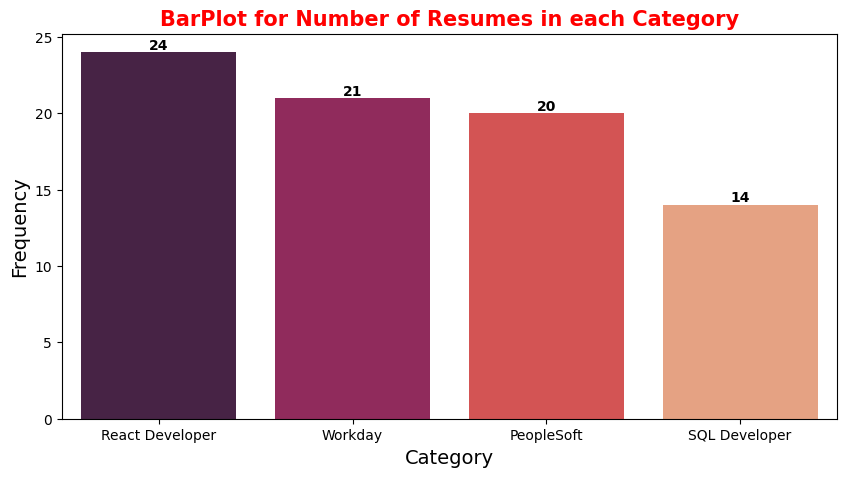

In [18]:
plt.figure(figsize=(10,5))
sns.barplot(x=resume['Category'].value_counts().index,y=resume['Category'].value_counts(),palette='rocket')
plt.title('BarPlot for Number of Resumes in each Category',fontweight='bold',fontsize=15,color='red')
plt.xlabel('Category',fontsize=14)
plt.ylabel('Frequency',fontsize=14)
for index,value in enumerate(resume['Category'].value_counts()):
  plt.text(index,value,str(value),va='bottom',ha='center',fontweight='bold')
plt.show()

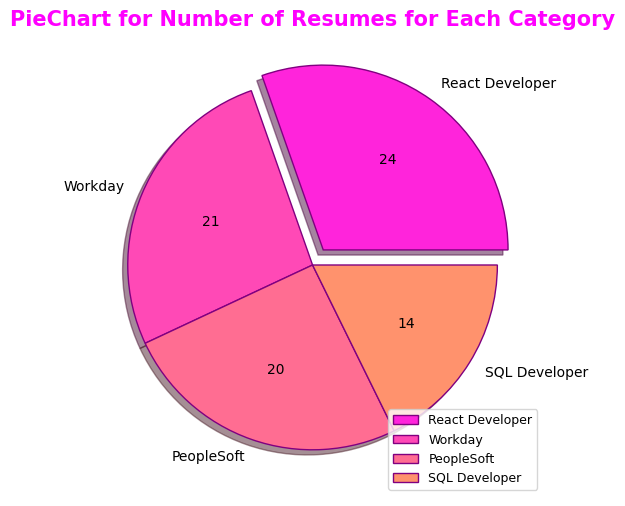

In [19]:
#pie plot
plt.figure(figsize=(6,6))
color=sns.color_palette('spring')
pie=resume['Category'].value_counts()
plt.pie(pie,labels=resume['Category'].value_counts().index,autopct=lambda x:'{:.0f}'.format(x*pie.sum()/100),colors=color,
        shadow=True,explode=[0.1,0,0,0],wedgeprops=dict(edgecolor='purple'))
plt.title('PieChart for Number of Resumes for Each Category',fontsize=15,fontweight='bold',color='Fuchsia')
plt.legend(loc='lower right',fontsize=9)
plt.show()

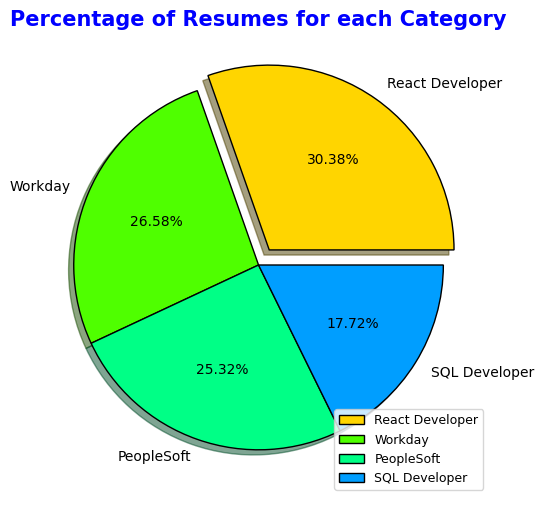

In [20]:
#pie plot
plt.figure(figsize=(6,6))
color=sns.color_palette('hsv')
plt.pie(resume['Category'].value_counts(),labels=resume['Category'].value_counts().index,autopct='%0.2f%%',colors=color,
        shadow=True,explode=[0.1,0,0,0],wedgeprops=dict(edgecolor='black'))
plt.title('Percentage of Resumes for each Category',fontsize=15,fontweight='bold',color='blue')
plt.legend(loc='lower right',fontsize=9)
plt.show()

# **Number of Character**

In [21]:
resume['char_count']=resume['Resumes'].str.len()
resume[['Resumes','char_count']]

Resumes  char_count
0   Hari Narayana \t\t              \n\n\t\n\n\n\n...        3714
1   C O N T A C T :\n\n\n\nAddress: Manyata Tech P...        2150
2   Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...        8010
3   PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...        7943
4   SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...        3800
..                                                ...         ...
74  Name\t: Naresh Babu Cherukuri\n\n\n\nObjective...        6792
75  Punugoti Swetha\n\nWorkday Technical Consultan...        4682
76  Shireesh Balasani                             ...       11610
77  Workday Integration Consultant\n\n\n\nName    ...        7030
78  Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...        6933

[79 rows x 2 columns]

# **Number of word in each resume**

In [22]:
resume['word_count']=resume['Resumes'].apply(lambda x:len(str(x).split(' ')))
resume[['Resumes','word_count']]

Resumes  word_count
0   Hari Narayana \t\t              \n\n\t\n\n\n\n...         448
1   C O N T A C T :\n\n\n\nAddress: Manyata Tech P...         356
2   Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...        1023
3   PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...         918
4   SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...         455
..                                                ...         ...
74  Name\t: Naresh Babu Cherukuri\n\n\n\nObjective...         840
75  Punugoti Swetha\n\nWorkday Technical Consultan...         541
76  Shireesh Balasani                             ...        1945
77  Workday Integration Consultant\n\n\n\nName    ...         904
78  Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...        1035

[79 rows x 2 columns]

# **Number of Numeric**

In [23]:
resume['numeric_count']=resume['Resumes'].apply(lambda x:len([x for x in x.split() if x.isdigit()]))
resume[['Resumes','numeric_count']]

Resumes  numeric_count
0   Hari Narayana \t\t              \n\n\t\n\n\n\n...             13
1   C O N T A C T :\n\n\n\nAddress: Manyata Tech P...              8
2   Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...              4
3   PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...              4
4   SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...             15
..                                                ...            ...
74  Name\t: Naresh Babu Cherukuri\n\n\n\nObjective...              4
75  Punugoti Swetha\n\nWorkday Technical Consultan...              3
76  Shireesh Balasani                             ...             16
77  Workday Integration Consultant\n\n\n\nName    ...              3
78  Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...              7

[79 rows x 2 columns]

# **Number of StopWords**

In [24]:
from nltk.corpus import stopwords
stop=stopwords.words('english')
resume['stop_word']=resume['Resumes'].apply(lambda x:len([x for x in x.split() if x in stop]))
resume[['Resumes','stop_word']]

Resumes  stop_word
0   Hari Narayana \t\t              \n\n\t\n\n\n\n...         88
1   C O N T A C T :\n\n\n\nAddress: Manyata Tech P...         42
2   Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...        190
3   PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...        225
4   SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...         86
..                                                ...        ...
74  Name\t: Naresh Babu Cherukuri\n\n\n\nObjective...        213
75  Punugoti Swetha\n\nWorkday Technical Consultan...        141
76  Shireesh Balasani                             ...        365
77  Workday Integration Consultant\n\n\n\nName    ...        197
78  Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...        193

[79 rows x 2 columns]

In [25]:
resume

Category                                            Resumes  char_count  \
0   PeopleSoft  Hari Narayana \t\t              \n\n\t\n\n\n\n...        3714   
1   PeopleSoft  C O N T A C T :\n\n\n\nAddress: Manyata Tech P...        2150   
2   PeopleSoft  Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...        8010   
3   PeopleSoft  PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...        7943   
4   PeopleSoft  SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...        3800   
..         ...                                                ...         ...   
74     Workday  Name\t: Naresh Babu Cherukuri\n\n\n\nObjective...        6792   
75     Workday  Punugoti Swetha\n\nWorkday Technical Consultan...        4682   
76     Workday  Shireesh Balasani                             ...       11610   
77     Workday  Workday Integration Consultant\n\n\n\nName    ...        7030   
78     Workday  Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...        6933   

    word_count  numeric_count  stop_word  
0          448             13         88  
1          356              8         42  
2         1023              4        190  
3          918              4        225  
4          455             15         86  
..         ...            ...        ...  
74         840              4        213  
75         541              3        141  
76        1945             16        365  
77         904              3        197  
78        1035              7        193  

[79 rows x 6 columns]

# **Text Analysis**

In [26]:
resume_df.head()

Category                                            Resumes
0  PeopleSoft  Hari Narayana \t\t              \n\n\t\n\n\n\n...
1  PeopleSoft  C O N T A C T :\n\n\n\nAddress: Manyata Tech P...
2  PeopleSoft  Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...
3  PeopleSoft  PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...
4  PeopleSoft  SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...

In [27]:
# removing spaces
strip=[x.strip() for x in resume_df['Resumes']]
strip=[x for x in strip if x]
strip[0:2]

['Hari Narayana \t\t              \n\n\t\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nPROFESSIONAL SUMMARY\n\nHaving 4.6 years of experience in PeopleSoft application enhancement, implementation, Data conversion, Support and Upgrade projects. Well experienced on People tools and having Functional knowledge HCM and FSCM Applications.\n\nSkill\n\n\n\n\n\n\n\nPeople Tools\n\nApplication Designer, Application Engine, People Code, Application Packages\n\nPeopleSoft Application\n\nFSCM and HCM Applications\n\nFSCM Modules\n\nProcurement, PO, AP, AR, Billing and GL\n\nHCM Modules\n\nRecruiting, Performance Management, WAF, Benefits\n\nInterfaces\n\nComponent Interface and File Layout\n\nOther Languages\n\nC, C++\n\nDatabase \n\nOracle, SQL Server, DB2\n\nOperating System\n\nWindows, UNIX\n\n\n\n\n\nEDUCATION\n\n\n\n\n\n\n\nBachelor of Technology (B-Tech) from JNTU-K\n\n\t   Currently Working as a People Soft Consultant in Randstad, Hyderabad\n\n\n\n\n\nRELEVANT EXPERIENCE\n\nPeopleSoft Consultant – Randsta

In [28]:
# joining all in one corpus
text=' '.join(strip)
text

'Hari Narayana \t\t              \n\n\t\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nPROFESSIONAL SUMMARY\n\nHaving 4.6 years of experience in PeopleSoft application enhancement, implementation, Data conversion, Support and Upgrade projects. Well experienced on People tools and having Functional knowledge HCM and FSCM Applications.\n\nSkill\n\n\n\n\n\n\n\nPeople Tools\n\nApplication Designer, Application Engine, People Code, Application Packages\n\nPeopleSoft Application\n\nFSCM and HCM Applications\n\nFSCM Modules\n\nProcurement, PO, AP, AR, Billing and GL\n\nHCM Modules\n\nRecruiting, Performance Management, WAF, Benefits\n\nInterfaces\n\nComponent Interface and File Layout\n\nOther Languages\n\nC, C++\n\nDatabase \n\nOracle, SQL Server, DB2\n\nOperating System\n\nWindows, UNIX\n\n\n\n\n\nEDUCATION\n\n\n\n\n\n\n\nBachelor of Technology (B-Tech) from JNTU-K\n\n\t   Currently Working as a People Soft Consultant in Randstad, Hyderabad\n\n\n\n\n\nRELEVANT EXPERIENCE\n\nPeopleSoft Consultant – Randstad

In [29]:
# Removal of Punctuation
no_punc=text.translate(str.maketrans('','',string.punctuation))
no_punc=no_punc.replace('\t','').replace('\n','')
no_punc=re.sub(r'\d+','',no_punc)
no_punc

'Hari Narayana               PROFESSIONAL SUMMARYHaving  years of experience in PeopleSoft application enhancement implementation Data conversion Support and Upgrade projects Well experienced on People tools and having Functional knowledge HCM and FSCM ApplicationsSkillPeople ToolsApplication Designer Application Engine People Code Application PackagesPeopleSoft ApplicationFSCM and HCM ApplicationsFSCM ModulesProcurement PO AP AR Billing and GLHCM ModulesRecruiting Performance Management WAF BenefitsInterfacesComponent Interface and File LayoutOther LanguagesC CDatabase Oracle SQL Server DBOperating SystemWindows UNIXEDUCATIONBachelor of Technology BTech from JNTUK   Currently Working as a People Soft Consultant in Randstad HyderabadRELEVANT EXPERIENCEPeopleSoft Consultant – Randstad Hyderabad Andhra Pradesh India June  to till dateProject  Randstad EnhancementsClient    Randstad Staffing ResponsibilitiesAnalyze the requirement documents to understand the customer business requirementP

# **Text Preprocessing**

**Tokenization**

In [30]:
#tokenization
from nltk.tokenize import word_tokenize
tokens=word_tokenize(no_punc)
print(tokens[0:11])

['Hari', 'Narayana', 'PROFESSIONAL', 'SUMMARYHaving', 'years', 'of', 'experience', 'in', 'PeopleSoft', 'application', 'enhancement']


In [31]:
len(tokens)

49805

In [32]:
token_df=pd.DataFrame(tokens)
token_df.value_counts().head()

and    2851
the    1378
in     1279
to     1100
of     1040
Name: count, dtype: int64

**Removal of StopWords**

In [33]:
# removal of stopword
stop=stopwords.words('english')
no_stop=[word for word in tokens if word not in stop]
print(no_stop[0:11])

['Hari', 'Narayana', 'PROFESSIONAL', 'SUMMARYHaving', 'years', 'experience', 'PeopleSoft', 'application', 'enhancement', 'implementation', 'Data']


**Normalization**

In [34]:
# normalization
lower_word=[x.lower() for x in no_stop]
print(lower_word[:25])

['hari', 'narayana', 'professional', 'summaryhaving', 'years', 'experience', 'peoplesoft', 'application', 'enhancement', 'implementation', 'data', 'conversion', 'support', 'upgrade', 'projects', 'well', 'experienced', 'people', 'tools', 'functional', 'knowledge', 'hcm', 'fscm', 'applicationsskillpeople', 'toolsapplication']


**Lemmatization**

In [35]:
#lemmatization
#! python -m spacy download en

In [36]:
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_word))
lemma=[token.lemma_ for token in doc]
print(lemma[0:25])

['hari', 'narayana', 'professional', 'summaryhaving', 'year', 'experience', 'peoplesoft', 'application', 'enhancement', 'implementation', 'datum', 'conversion', 'support', 'upgrade', 'project', 'well', 'experience', 'people', 'tool', 'functional', 'knowledge', 'hcm', 'fscm', 'applicationsskillpeople', 'toolsapplication']


# **Feature Extraction**

# **1.Count Vectorizer**

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(analyzer='word',ngram_range=(1,2),max_features=100)
cv_fit=cv.fit_transform(lemma)
print(cv.vocabulary_)

{'professional': 64, 'year': 99, 'experience': 28, 'peoplesoft': 59, 'application': 0, 'implementation': 37, 'datum': 18, 'support': 80, 'project': 65, 'people': 58, 'tool': 89, 'functional': 33, 'knowledge': 47, 'hcm': 35, 'fscm': 31, 'code': 7, 'performance': 61, 'management': 52, 'interface': 41, 'file': 30, 'oracle': 56, 'sql': 78, 'server': 74, 'technology': 85, 'work': 96, 'till': 88, 'requirement': 70, 'document': 24, 'business': 3, 'technical': 84, 'system': 81, 'design': 19, 'object': 55, 'custom': 15, 'process': 62, 'test': 86, 'component': 8, 'load': 49, 'base': 2, 'report': 69, 'testing': 87, 'development': 22, 'new': 54, 'various': 94, 'like': 48, 'user': 93, 'service': 75, 'security': 73, 'information': 39, 'job': 45, 'team': 83, 'maintain': 50, 'develop': 20, 'change': 5, 'per': 60, 'client': 6, 'software': 77, 'environment': 27, 'role': 71, 'production': 63, 'migration': 53, 'database': 17, 'update': 91, 'web': 95, 'scheduler': 72, 'use': 92, 'integration': 40, 'configu

In [38]:
df_cv=pd.DataFrame(cv.vocabulary_,columns=cv.vocabulary_.keys(),index=[0])
df_cv.from_records([cv.vocabulary_]).T.sort_values(0,ascending=False).head(10)

0
year            99
xml             98
workday         97
work            96
web             95
various         94
user            93
use             92
update          91
transformation  90

In [39]:
print(cv.get_feature_names_out())
print(cv_fit.toarray())

['application' 'apply' 'base' 'business' 'calculate' 'change' 'client'
 'code' 'component' 'configuration' 'configure' 'connector' 'core'
 'create' 'css' 'custom' 'data' 'database' 'datum' 'design' 'develop'
 'developer' 'development' 'different' 'document' 'domain' 'eib'
 'environment' 'experience' 'field' 'file' 'fscm' 'function' 'functional'
 'good' 'hcm' 'html' 'implementation' 'include' 'information'
 'integration' 'interface' 'involve' 'issue' 'it' 'job' 'js' 'knowledge'
 'like' 'load' 'maintain' 'maintenance' 'management' 'migration' 'new'
 'object' 'oracle' 'organization' 'people' 'peoplesoft' 'per'
 'performance' 'process' 'production' 'professional' 'project' 'provide'
 'query' 'react' 'report' 'requirement' 'role' 'scheduler' 'security'
 'server' 'service' 'skill' 'software' 'sql' 'studio' 'support' 'system'
 'table' 'team' 'technical' 'technology' 'test' 'testing' 'till' 'tool'
 'transformation' 'update' 'use' 'user' 'various' 'web' 'work' 'workday'
 'xml' 'year']
[[0 0 0 .

In [40]:
print(cv.get_feature_names_out().shape)
print(cv_fit.toarray().shape)

(100,)
(37333, 100)


# **2.TFidf Vectorizer**

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
tfidf_fit=tfidf.fit_transform(lemma)
print(tfidf.vocabulary_)

{'hari': 2572, 'narayana': 3749, 'professional': 4436, 'summaryhaving': 5799, 'year': 6790, 'experience': 2109, 'peoplesoft': 4140, 'application': 288, 'enhancement': 1942, 'implementation': 2771, 'datum': 1420, 'conversion': 1176, 'support': 5831, 'upgrade': 6432, 'project': 4473, 'well': 6659, 'people': 4136, 'tool': 6199, 'functional': 2350, 'knowledge': 3188, 'hcm': 2581, 'fscm': 2333, 'applicationsskillpeople': 323, 'toolsapplication': 6211, 'designer': 1552, 'engine': 1916, 'code': 930, 'packagespeoplesoft': 4037, 'applicationfscm': 297, 'applicationsfscm': 312, 'modulesprocurement': 3625, 'po': 4255, 'ap': 274, 'ar': 362, 'billing': 616, 'glhcm': 2442, 'modulesrecruite': 3627, 'performance': 4162, 'management': 3424, 'waf': 6617, 'benefitsinterfacescomponent': 592, 'interface': 2957, 'file': 2230, 'layoutother': 3244, 'languagesc': 3226, 'cdatabase': 805, 'oracle': 3955, 'sql': 5591, 'server': 5261, 'dboperating': 1438, 'systemwindow': 5934, 'unixeducationbachelor': 6407, 'techn

In [42]:
df_tfidf=pd.DataFrame(tfidf.vocabulary_,columns=tfidf.vocabulary_.keys(),index=[0])
df_tfidf.from_records([tfidf.vocabulary_]).T.sort_values(0,ascending=False).head(15)

0
ﬁt               6812
ﬁnding           6811
zp               6810
zone             6809
zerozilla        6808
zero             6807
zenefitsworkday  6806
zenefit          6805
zealand          6804
yrs              6803
yours            6802
your             6801
young            6800
you              6799
york             6798

In [43]:
print(tfidf.get_feature_names_out().shape)
print(tfidf_fit.toarray().shape)

(6813,)
(37333, 6813)


# **Generating Word Cloud**

In [44]:
def plot_cloud(wordcloud):
  plt.figure(figsize=(40,30))
  plt.imshow(wordcloud)
  plt.axis('off')


stopwords=STOPWORDS
wordcloud=WordCloud(width=3000,height=2000,background_color='fuchsia',max_words=100,colormap='gist_rainbow',
                    stopwords=stopwords).generate(text)

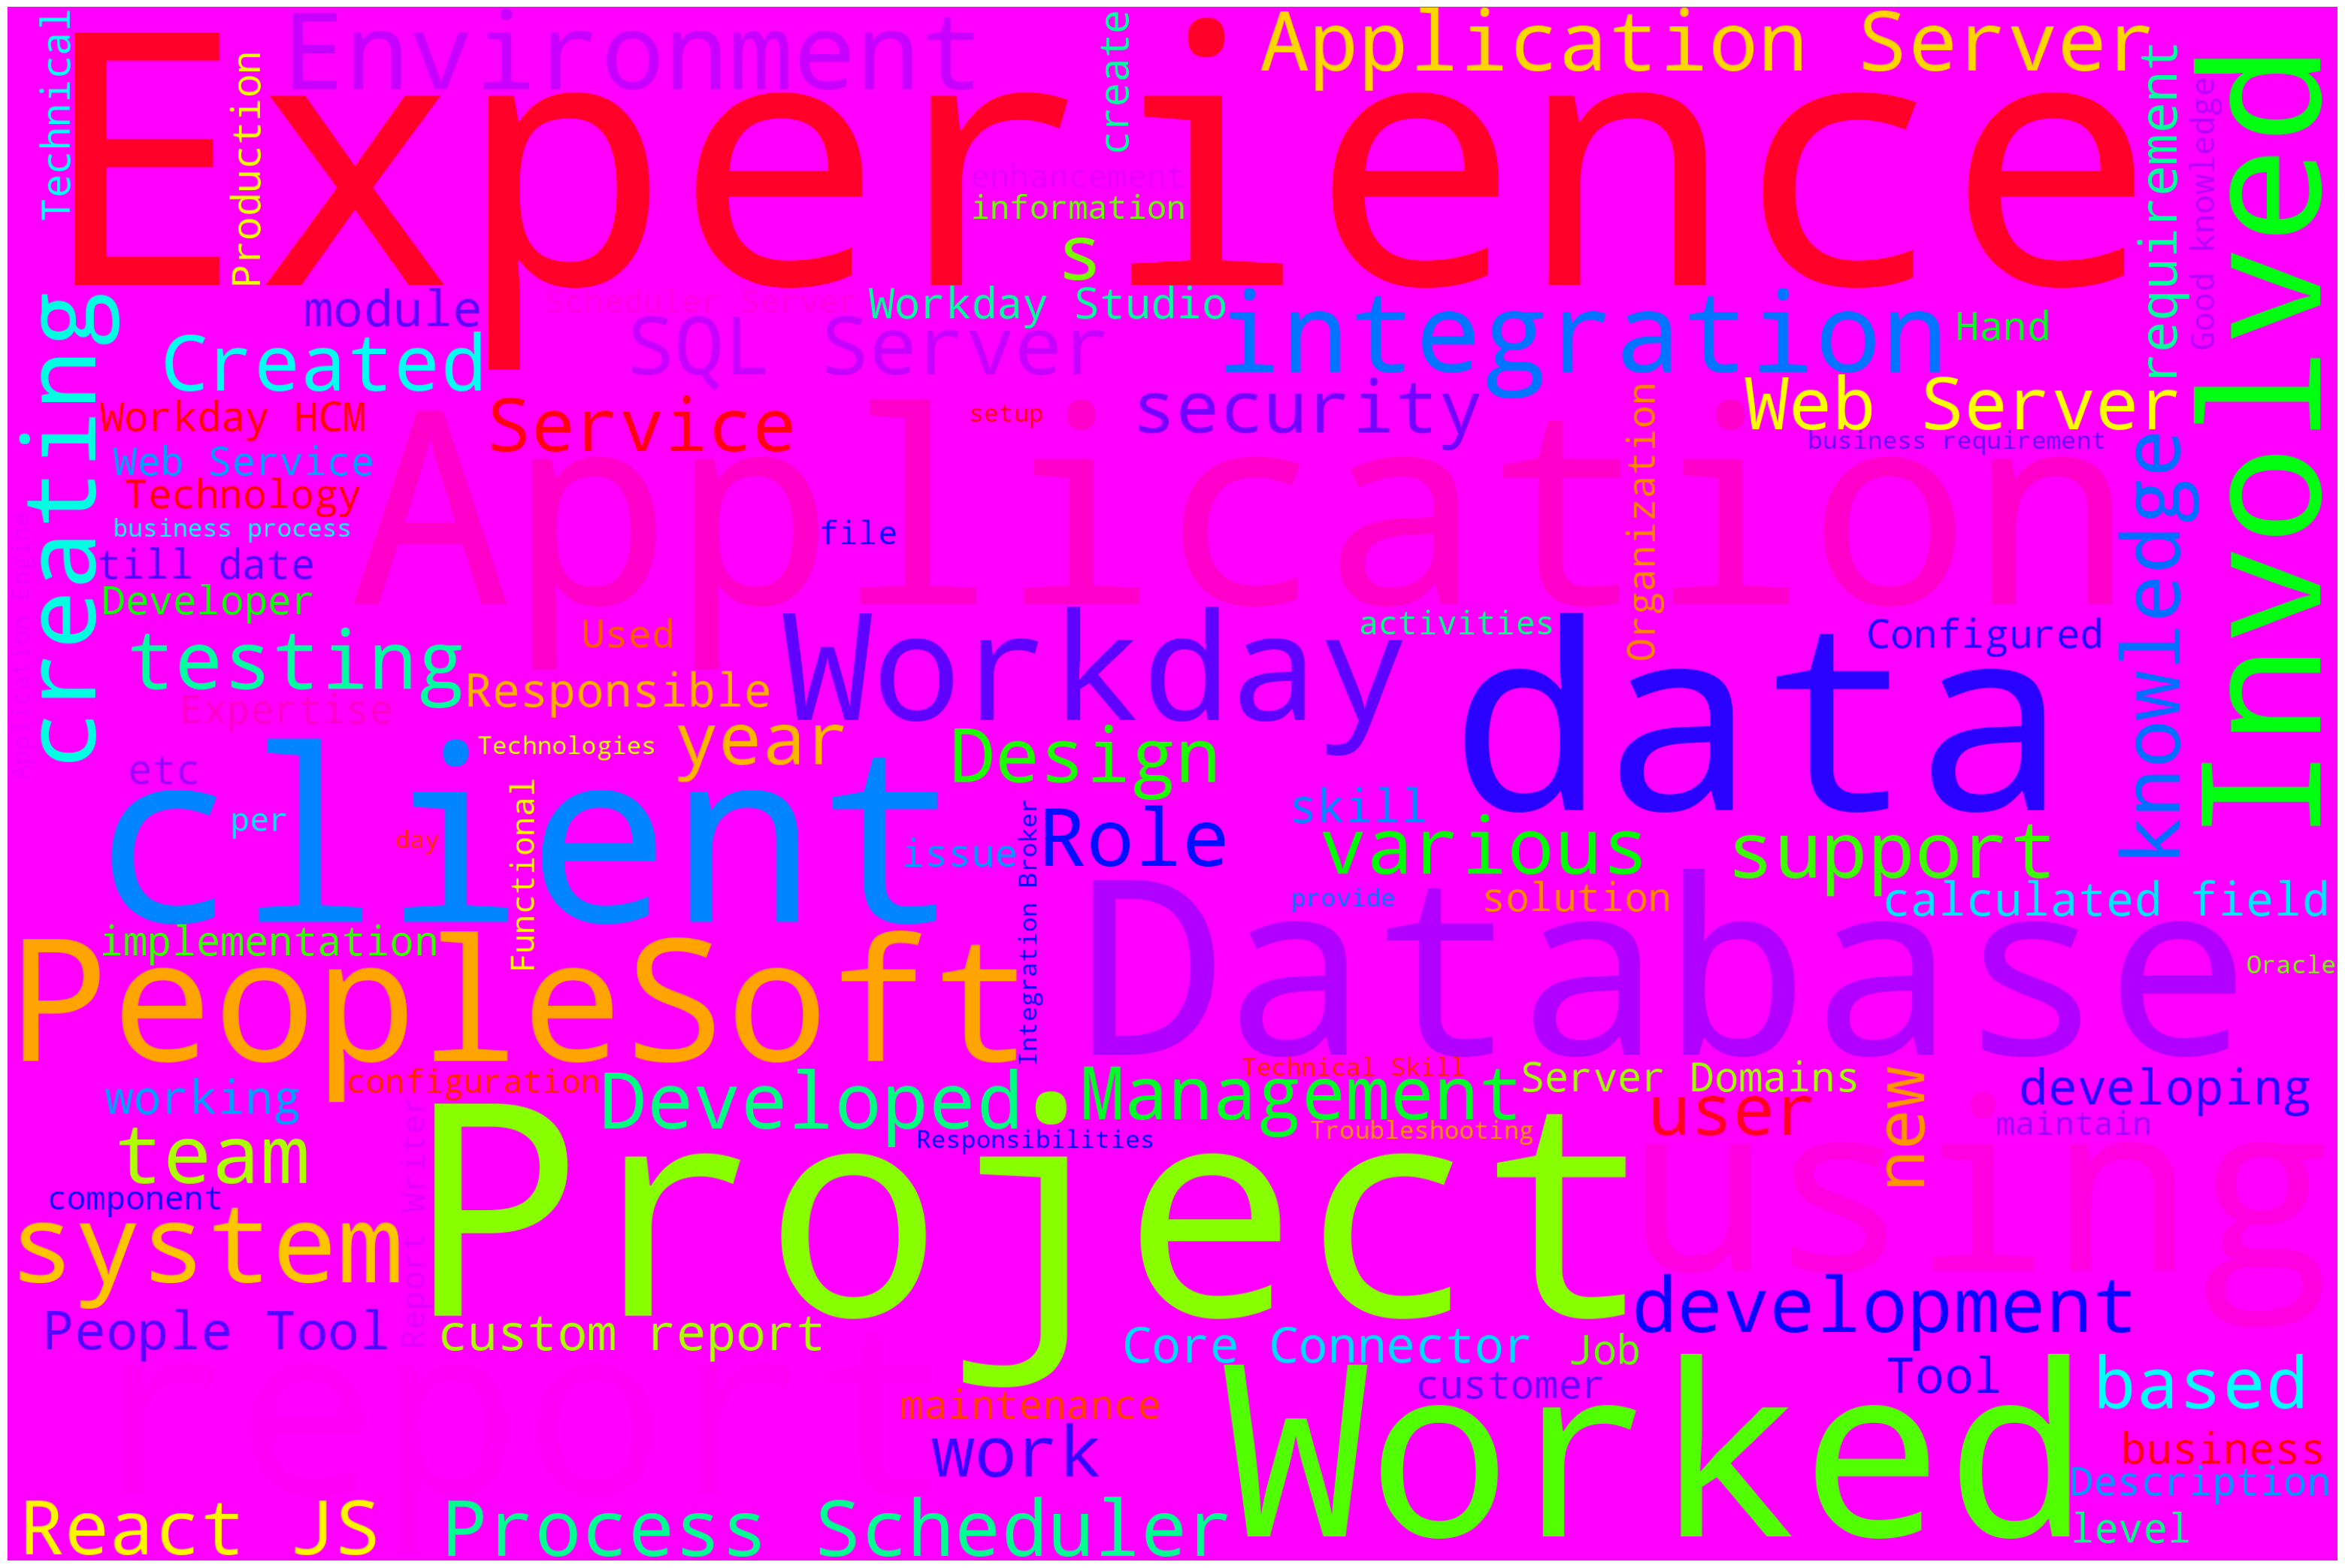

In [45]:
plot_cloud(wordcloud)

# **Named Entity Recognition**

In [46]:
# entity tagging
nlp=spacy.load('en_core_web_sm')
one_block=no_punc
doc_block=nlp(str(one_block))
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [47]:
for token in doc_block[50:75]:
  print(token,':',token.pos_)

and : CCONJ
GLHCM : PROPN
ModulesRecruiting : PROPN
Performance : PROPN
Management : PROPN
WAF : PROPN
BenefitsInterfacesComponent : PROPN
Interface : PROPN
and : CCONJ
File : PROPN
LayoutOther : PROPN
LanguagesC : PUNCT
CDatabase : PROPN
Oracle : PROPN
SQL : PROPN
Server : PROPN
DBOperating : PROPN
SystemWindows : PROPN
UNIXEDUCATIONBachelor : PROPN
of : ADP
Technology : PROPN
BTech : PROPN
from : ADP
JNTUK : PROPN
   : SPACE


In [48]:
#filter noun and verb only

noun_verb=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
#counting numbers
cv=CountVectorizer()
fit=cv.fit_transform(noun_verb)
sum_words=fit.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq,key=lambda x:x[1],reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['words','count']
wd_df[0:15]

words  count
0          using    391
1     experience    285
2           data    205
3       business    184
4    application    182
5        reports    178
6      knowledge    141
7            web    134
8       creating    133
9   integrations    113
10       working    105
11       support    102
12        system     99
13      database     97
14        server     94

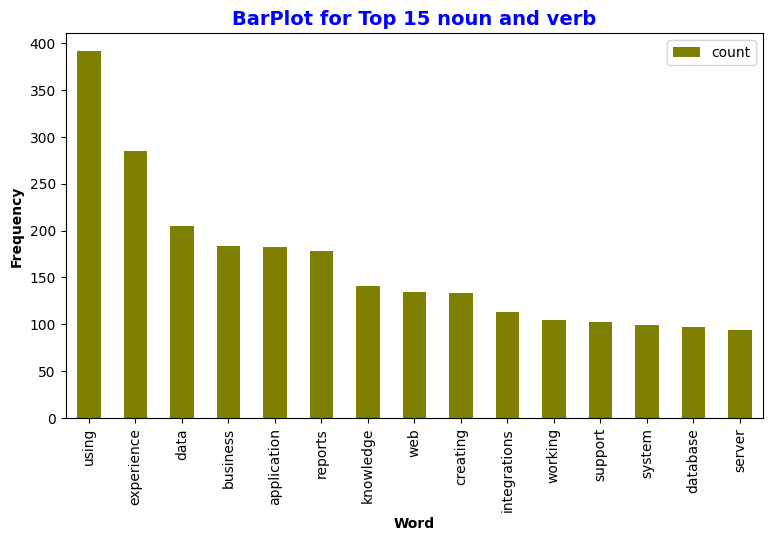

In [49]:
# bar plot for top 15 words
wd_df[0:15].plot.bar(x='words',figsize=(9,5),color='olive')
plt.title('BarPlot for Top 15 noun and verb',fontsize=14,color='blue',fontweight='bold')
plt.xlabel('Word',fontweight='bold')
plt.ylabel('Frequency',fontweight='bold')
plt.show()

# **Model Engineering**

# **Label Encoding**

In [50]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
resume_df['LabelEncoding']=le.fit_transform(resume_df['Category'])
resume_df

Category                                            Resumes  \
0   PeopleSoft  Hari Narayana \t\t              \n\n\t\n\n\n\n...   
1   PeopleSoft  C O N T A C T :\n\n\n\nAddress: Manyata Tech P...   
2   PeopleSoft  Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...   
3   PeopleSoft  PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...   
4   PeopleSoft  SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...   
..         ...                                                ...   
74     Workday  Name\t: Naresh Babu Cherukuri\n\n\n\nObjective...   
75     Workday  Punugoti Swetha\n\nWorkday Technical Consultan...   
76     Workday  Shireesh Balasani                             ...   
77     Workday  Workday Integration Consultant\n\n\n\nName    ...   
78     Workday  Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...   

    LabelEncoding  
0               0  
1               0  
2               0  
3               0  
4               0  
..            ...  
74              3  
75              3  
76              3  
77              3  
78              3  

[79 rows x 3 columns]

In [51]:
resume_df.describe()

LabelEncoding
count      79.000000
mean        1.455696
std         1.141271
min         0.000000
25%         0.500000
50%         1.000000
75%         3.000000
max         3.000000

In [52]:
resume_df.isnull().sum()

Category         0
Resumes          0
LabelEncoding    0
dtype: int64

# **Train-Test Split**

In [53]:
x=resume_df['Resumes'].values
y=resume_df['Category'].values

In [54]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=18,stratify=y)

In [55]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(55,)
(24,)
(55,)
(24,)


# **TF-IDF Vectorizer**

In [56]:
# tfidf vectorizer is used to convert text data into numerical feature vector because machine doesnot understand text data.
# It also reflects the importance of words withing document for various process

In [57]:
tfidf=TfidfVectorizer(sublinear_tf=True,stop_words='english')

In [58]:
xtrain=tfidf.fit_transform(xtrain)
xtest=tfidf.transform(xtest)

In [59]:
print(xtrain)

  (0, 2890)	0.07176660954400008
  (0, 1951)	0.019468243660584958
  (0, 495)	0.04956869069438662
  (0, 3577)	0.030602041973432505
  (0, 1493)	0.04352602431327046
  (0, 2490)	0.05356717344261069
  (0, 992)	0.0313070777636781
  (0, 3463)	0.03838804719666642
  (0, 1257)	0.03362235182887763
  (0, 1953)	0.03838804719666642
  (0, 1765)	0.03838804719666642
  (0, 2295)	0.0395309721111514
  (0, 1405)	0.0565874832980558
  (0, 1516)	0.04352602431327046
  (0, 2548)	0.05425429154788375
  (0, 3611)	0.02690548146207733
  (0, 1889)	0.05356717344261069
  (0, 248)	0.05356717344261069
  (0, 1254)	0.028650866974421006
  (0, 730)	0.030602041973432505
  (0, 2795)	0.07176660954400008
  (0, 3446)	0.027467089164652292
  (0, 3459)	0.04749008017567607
  (0, 448)	0.037318912340232796
  (0, 3068)	0.11013878248403562
  :	:
  (54, 2939)	0.04808759675074194
  (54, 702)	0.038065473886466146
  (54, 2925)	0.04312893060841591
  (54, 1414)	0.035089676242052066
  (54, 591)	0.03907581446083159
  (54, 3804)	0.0442198878696680

In [60]:
print(xtest)

  (0, 3837)	0.019032051681523887
  (0, 3815)	0.06475229668556062
  (0, 3810)	0.020096297876763508
  (0, 3804)	0.023775955719746753
  (0, 3792)	0.056328734804354505
  (0, 3789)	0.04443114142262873
  (0, 3778)	0.10656811215247473
  (0, 3765)	0.06767363450338652
  (0, 3692)	0.04663607822176511
  (0, 3669)	0.06767363450338652
  (0, 3641)	0.05313291050073204
  (0, 3639)	0.07388377984988642
  (0, 3638)	0.0471265300014359
  (0, 3633)	0.056328734804354505
  (0, 3623)	0.07896174435355467
  (0, 3620)	0.09422490806394837
  (0, 3612)	0.04332699985465398
  (0, 3575)	0.041892174183542255
  (0, 3521)	0.062041880259461585
  (0, 3520)	0.06693930732450118
  (0, 3516)	0.07143845389834694
  (0, 3513)	0.04332699985465398
  (0, 3479)	0.06475229668556062
  (0, 3459)	0.027920153934897232
  (0, 3457)	0.040256192392007326
  :	:
  (23, 730)	0.040024124694917826
  (23, 656)	0.13349608361705106
  (23, 654)	0.1440494842701839
  (23, 624)	0.1523100032256651
  (23, 568)	0.06672012938350368
  (23, 541)	0.0938628779025

In [61]:
print(xtrain.shape)
print(xtest.shape)

(55, 3845)
(24, 3845)


In [62]:
print(ytrain)
print(ytest)

['Workday' 'Workday' 'PeopleSoft' 'PeopleSoft' 'Workday' 'React Developer'
 'React Developer' 'PeopleSoft' 'React Developer' 'Workday' 'PeopleSoft'
 'React Developer' 'React Developer' 'SQL Developer' 'SQL Developer'
 'PeopleSoft' 'PeopleSoft' 'Workday' 'Workday' 'React Developer' 'Workday'
 'React Developer' 'React Developer' 'React Developer' 'PeopleSoft'
 'Workday' 'SQL Developer' 'Workday' 'React Developer' 'PeopleSoft'
 'SQL Developer' 'React Developer' 'React Developer' 'PeopleSoft'
 'SQL Developer' 'PeopleSoft' 'Workday' 'React Developer' 'PeopleSoft'
 'Workday' 'React Developer' 'SQL Developer' 'PeopleSoft' 'PeopleSoft'
 'SQL Developer' 'SQL Developer' 'React Developer' 'PeopleSoft'
 'SQL Developer' 'SQL Developer' 'Workday' 'React Developer'
 'React Developer' 'Workday' 'Workday']
['PeopleSoft' 'React Developer' 'Workday' 'PeopleSoft' 'SQL Developer'
 'PeopleSoft' 'Workday' 'React Developer' 'SQL Developer' 'Workday'
 'Workday' 'Workday' 'PeopleSoft' 'React Developer' 'React D

In [63]:
print(ytrain.shape)
print(ytest.shape)

(55,)
(24,)


# **Model Building Methods**

# **1.Logistic Regression**

In [64]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression(max_iter=300,random_state=18)   #initialization
lr_model.fit(xtrain,ytrain)                                 #fitting
ypred_lr=lr_model.predict(xtest)                               #prediction

In [65]:
ypred_lr

array(['PeopleSoft', 'React Developer', 'Workday', 'PeopleSoft',
       'SQL Developer', 'PeopleSoft', 'Workday', 'React Developer',
       'SQL Developer', 'Workday', 'Workday', 'Workday', 'PeopleSoft',
       'React Developer', 'React Developer', 'React Developer',
       'React Developer', 'Workday', 'SQL Developer', 'SQL Developer',
       'Workday', 'PeopleSoft', 'PeopleSoft', 'React Developer'],
      dtype=object)

In [66]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,f1_score,precision_score,recall_score

In [67]:
#classfication report
print('Classification_report:','\n',classification_report(ytest,ypred_lr))

Classification_report: 
                  precision    recall  f1-score   support

     PeopleSoft       1.00      1.00      1.00         6
React Developer       1.00      1.00      1.00         7
  SQL Developer       1.00      1.00      1.00         4
        Workday       1.00      1.00      1.00         7

       accuracy                           1.00        24
      macro avg       1.00      1.00      1.00        24
   weighted avg       1.00      1.00      1.00        24



In [68]:
#accuracy
accuracy_lr=round(accuracy_score(ytest,ypred_lr),2)
#training accuracy
train_lr=round(lr_model.score(xtrain,ytrain),2)
#testing accuracy
test_lr=round(lr_model.score(xtest,ytest),2)
precision_lr=precision_score(ytest,ypred_lr,average='macro')
recall_lr=recall_score(ytest,ypred_lr,average='macro')
f1_lr=f1_score(ytest,ypred_lr,average='macro')
print('Accuracy Score:',accuracy_lr)
print('Training Accuracy:',train_lr)
print('Testing Accuracy:',test_lr)

Accuracy Score: 1.0
Training Accuracy: 1.0
Testing Accuracy: 1.0


In [69]:
#confusion_matrix
print('Confusion_matrix:','\n',confusion_matrix(ytest,ypred_lr))

Confusion_matrix: 
 [[6 0 0 0]
 [0 7 0 0]
 [0 0 4 0]
 [0 0 0 7]]


# **2.DecisionTree Classifier**

In [70]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=18) #intialization
dt_model.fit(xtrain,ytrain)                                                   #fitting
ypred_dt=dt_model.predict(xtest)                                                 #prediction

In [71]:
ypred_dt

array(['PeopleSoft', 'React Developer', 'Workday', 'PeopleSoft',
       'SQL Developer', 'PeopleSoft', 'PeopleSoft', 'React Developer',
       'SQL Developer', 'Workday', 'Workday', 'Workday', 'PeopleSoft',
       'React Developer', 'React Developer', 'PeopleSoft',
       'React Developer', 'Workday', 'SQL Developer', 'SQL Developer',
       'Workday', 'PeopleSoft', 'PeopleSoft', 'PeopleSoft'], dtype=object)

In [72]:
#classification report
print('Classification Report:','\n',classification_report(ytest,ypred_dt))

Classification Report: 
                  precision    recall  f1-score   support

     PeopleSoft       0.67      1.00      0.80         6
React Developer       1.00      0.71      0.83         7
  SQL Developer       1.00      1.00      1.00         4
        Workday       1.00      0.86      0.92         7

       accuracy                           0.88        24
      macro avg       0.92      0.89      0.89        24
   weighted avg       0.92      0.88      0.88        24



In [73]:
accuracy_dt=round(accuracy_score(ytest,ypred_dt),2)   #accuracy
train_dt=dt_model.score(xtrain,ytrain)                #training accuracy
test_dt=round(dt_model.score(xtest,ytest),2)          #testing accuracy
precision_dt=round(precision_score(ytest,ypred_dt,average='macro'),2) #precision
recall_dt=round(recall_score(ytest,ypred_dt,average='macro'),2)       #recall
f1_dt=round(f1_score(ytest,ypred_dt,average='macro'),2)               #f1_score
print('Accuracy Score:',accuracy_dt)
print('Training Accuracy:',train_dt)
print('Testing Accuracy:',test_dt)

Accuracy Score: 0.88
Training Accuracy: 1.0
Testing Accuracy: 0.88


In [74]:
#confusion matrix
print('Confusion Matrix:','\n',confusion_matrix(ytest,ypred_dt))

Confusion Matrix: 
 [[6 0 0 0]
 [2 5 0 0]
 [0 0 4 0]
 [1 0 0 6]]


# **3.KNN Classifier**

In [75]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(n_neighbors=30) #initialization
knn_model.fit(xtrain,ytrain)                                          #fitting
ypred_knn=knn_model.predict(xtest)                                   #prediction

In [76]:
ypred_knn

array(['PeopleSoft', 'React Developer', 'Workday', 'PeopleSoft',
       'SQL Developer', 'PeopleSoft', 'Workday', 'React Developer',
       'Workday', 'Workday', 'Workday', 'Workday', 'PeopleSoft',
       'React Developer', 'React Developer', 'React Developer',
       'React Developer', 'Workday', 'SQL Developer', 'Workday',
       'Workday', 'PeopleSoft', 'PeopleSoft', 'React Developer'],
      dtype=object)

In [77]:
#classification report
print('Classification Report:','\n',classification_report(ytest,ypred_knn))

Classification Report: 
                  precision    recall  f1-score   support

     PeopleSoft       1.00      1.00      1.00         6
React Developer       1.00      1.00      1.00         7
  SQL Developer       1.00      0.50      0.67         4
        Workday       0.78      1.00      0.88         7

       accuracy                           0.92        24
      macro avg       0.94      0.88      0.89        24
   weighted avg       0.94      0.92      0.91        24



In [78]:
accuracy_knn=round(accuracy_score(ytest,ypred_knn),2) #accuracy
train_knn=round(knn_model.score(xtrain,ytrain),2) #training accuracy
test_knn=round(knn_model.score(xtest,ytest),2)   #testing accuracy
precision_knn=round(precision_score(ytest,ypred_knn,average='macro'),2) #precision
recall_knn=round(recall_score(ytest,ypred_knn,average='macro'),2)   #recall
f1_knn=round(f1_score(ytest,ypred_knn,average='macro'),2)  #f1_score
print('Accuracy Score:',accuracy_knn)
print('Training Score:',train_knn)
print('Testing Score:',test_knn)

Accuracy Score: 0.92
Training Score: 0.89
Testing Score: 0.92


In [79]:
#confusion_matrix
print('Confusion Matrix:','\n',confusion_matrix(ytest,ypred_knn))

Confusion Matrix: 
 [[6 0 0 0]
 [0 7 0 0]
 [0 0 2 2]
 [0 0 0 7]]


# **4.SVM Classifier**

In [80]:
from sklearn.svm import SVC
svc_model=SVC(kernel='poly',C=15,gamma=33) #initialization
svc_model.fit(xtrain,ytrain) #fitting
ypred_svc=svc_model.predict(xtest) #predict

In [81]:
ypred_svc

array(['PeopleSoft', 'React Developer', 'Workday', 'PeopleSoft',
       'React Developer', 'PeopleSoft', 'Workday', 'React Developer',
       'React Developer', 'Workday', 'Workday', 'Workday', 'PeopleSoft',
       'React Developer', 'React Developer', 'React Developer',
       'React Developer', 'Workday', 'React Developer', 'React Developer',
       'Workday', 'PeopleSoft', 'React Developer', 'React Developer'],
      dtype=object)

In [82]:
#classification report
print('Classification Report:','\n',classification_report(ytest,ypred_svc))

Classification Report: 
                  precision    recall  f1-score   support

     PeopleSoft       1.00      0.83      0.91         6
React Developer       0.58      1.00      0.74         7
  SQL Developer       0.00      0.00      0.00         4
        Workday       1.00      1.00      1.00         7

       accuracy                           0.79        24
      macro avg       0.65      0.71      0.66        24
   weighted avg       0.71      0.79      0.73        24



In [83]:
accuracy_svc=round(accuracy_score(ytest,ypred_svc),2) #accuracy score
train_svc=round(svc_model.score(xtrain,ytrain),2) #training accuracy
test_svc=round(svc_model.score(xtest,ytest),2) #testing accuracy
precision_svc=round(precision_score(ytest,ypred_svc,average='macro'),2) #precision
recall_svc=round(recall_score(ytest,ypred_svc,average='macro'),2) #recall
f1_svc=round(f1_score(ytest,ypred_svc,average='macro'),2) #f1_score
print('Accuracy Score:',accuracy_svc)
print('Training Accuracy Score:',train_svc)
print('Testing Accuracy Score:',test_svc)

Accuracy Score: 0.79
Training Accuracy Score: 1.0
Testing Accuracy Score: 0.79


In [84]:
#confusion matrix
print('Confusion Matrix:','\n',confusion_matrix(ytest,ypred_svc))

Confusion Matrix: 
 [[5 1 0 0]
 [0 7 0 0]
 [0 4 0 0]
 [0 0 0 7]]


# **5.Naive Bayers Classifier**

In [85]:
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
nb_model=BernoulliNB()  #initialization
nb_model.fit(xtrain,ytrain) #fitting
ypred_nb=nb_model.predict(xtest) #prediction

In [86]:
ypred_nb

array(['PeopleSoft', 'React Developer', 'Workday', 'PeopleSoft',
       'React Developer', 'PeopleSoft', 'Workday', 'React Developer',
       'SQL Developer', 'Workday', 'Workday', 'Workday', 'PeopleSoft',
       'React Developer', 'React Developer', 'React Developer',
       'React Developer', 'Workday', 'React Developer', 'React Developer',
       'Workday', 'PeopleSoft', 'PeopleSoft', 'React Developer'],
      dtype='<U15')

In [87]:
#classification report
print('Classification Report:','\n',classification_report(ytest,ypred_nb))

Classification Report: 
                  precision    recall  f1-score   support

     PeopleSoft       1.00      1.00      1.00         6
React Developer       0.70      1.00      0.82         7
  SQL Developer       1.00      0.25      0.40         4
        Workday       1.00      1.00      1.00         7

       accuracy                           0.88        24
      macro avg       0.93      0.81      0.81        24
   weighted avg       0.91      0.88      0.85        24



In [88]:
accuracy_nb=round(accuracy_score(ytest,ypred_nb),2) #accuracy
train_nb=round(nb_model.score(xtrain,ytrain),2) #training accuracy
test_nb=round(nb_model.score(xtest,ytest),2)   #testing accuracy
precision_nb=round(precision_score(ytest,ypred_nb,average='macro'),2) #precision
recall_nb=round(recall_score(ytest,ypred_nb,average='macro'),2) #recall
f1_nb=round(f1_score(ytest,ypred_nb,average='macro'),2) #f1_score
print('Accuracy Score:',accuracy_nb)
print('Training Accuracy Score:',train_nb)
print('Testing Accuracy Score:',test_nb)

Accuracy Score: 0.88
Training Accuracy Score: 1.0
Testing Accuracy Score: 0.88


In [89]:
#confusion matrix
print('Confusion Matrix:','\n',confusion_matrix(ytest,ypred_nb))

Confusion Matrix: 
 [[6 0 0 0]
 [0 7 0 0]
 [0 3 1 0]
 [0 0 0 7]]


# **6.Random Forest Classifier**

In [90]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(criterion='entropy',n_estimators=100,max_features=3,random_state=18) #initialization
rf_model.fit(xtrain,ytrain) #fitting
ypred_rf=rf_model.predict(xtest) #predict

In [91]:
ypred_rf

array(['PeopleSoft', 'React Developer', 'Workday', 'PeopleSoft',
       'SQL Developer', 'PeopleSoft', 'Workday', 'React Developer',
       'SQL Developer', 'Workday', 'Workday', 'Workday', 'PeopleSoft',
       'React Developer', 'React Developer', 'React Developer',
       'React Developer', 'Workday', 'SQL Developer', 'SQL Developer',
       'Workday', 'PeopleSoft', 'React Developer', 'React Developer'],
      dtype=object)

In [92]:
#classification report
print('Classification Report:','\n',classification_report(ytest,ypred_rf))

Classification Report: 
                  precision    recall  f1-score   support

     PeopleSoft       1.00      0.83      0.91         6
React Developer       0.88      1.00      0.93         7
  SQL Developer       1.00      1.00      1.00         4
        Workday       1.00      1.00      1.00         7

       accuracy                           0.96        24
      macro avg       0.97      0.96      0.96        24
   weighted avg       0.96      0.96      0.96        24



In [93]:
accuracy_rf=round(accuracy_score(ytest,ypred_rf),2) #accuracy
train_rf=round(rf_model.score(xtrain,ytrain),2) #training accuracy
test_rf=round(rf_model.score(xtest,ytest),2)   #testing accuracy
precision_rf=round(precision_score(ytest,ypred_rf,average='macro'),2) #precision
recall_rf=round(recall_score(ytest,ypred_rf,average='macro'),2) #recall
f1_rf=round(f1_score(ytest,ypred_rf,average='macro'),2) #f1_score
print('Accuracy Score:',accuracy_rf)
print('Training Accuracy Score:',train_rf)
print('Testing Accuracy Score:',test_rf)

Accuracy Score: 0.96
Training Accuracy Score: 1.0
Testing Accuracy Score: 0.96


In [94]:
#confusion matrix
print('Confusion Matrix:','\n',confusion_matrix(ytest,ypred_rf))

Confusion Matrix: 
 [[5 1 0 0]
 [0 7 0 0]
 [0 0 4 0]
 [0 0 0 7]]


# **7.Bagging Classifier**

In [95]:
from sklearn.ensemble import BaggingClassifier
bg_model=BaggingClassifier(base_estimator=rf_model,n_estimators=51,random_state=18) #initialization
bg_model.fit(xtrain,ytrain) #fitting
ypred_bg=bg_model.predict(xtest) #predict

In [96]:
ypred_bg

array(['PeopleSoft', 'React Developer', 'Workday', 'PeopleSoft',
       'SQL Developer', 'PeopleSoft', 'Workday', 'React Developer',
       'SQL Developer', 'Workday', 'Workday', 'Workday', 'PeopleSoft',
       'React Developer', 'React Developer', 'React Developer',
       'React Developer', 'Workday', 'SQL Developer', 'React Developer',
       'Workday', 'PeopleSoft', 'PeopleSoft', 'React Developer'],
      dtype=object)

In [97]:
#classification report
print('Classification Report:','\n',classification_report(ytest,ypred_bg))

Classification Report: 
                  precision    recall  f1-score   support

     PeopleSoft       1.00      1.00      1.00         6
React Developer       0.88      1.00      0.93         7
  SQL Developer       1.00      0.75      0.86         4
        Workday       1.00      1.00      1.00         7

       accuracy                           0.96        24
      macro avg       0.97      0.94      0.95        24
   weighted avg       0.96      0.96      0.96        24



In [98]:
accuracy_bg=round(accuracy_score(ytest,ypred_bg),2) #accuracy
train_bg=round(bg_model.score(xtrain,ytrain),2) #training accuracy
test_bg=round(bg_model.score(xtest,ytest),2)   #testing accuracy
precision_bg=round(precision_score(ytest,ypred_bg,average='macro'),2) #precision
recall_bg=round(recall_score(ytest,ypred_bg,average='macro'),2) #recall
f1_bg=round(f1_score(ytest,ypred_bg,average='macro'),2) #f1_score
print('Accuracy Score:',accuracy_bg)
print('Training Accuracy Score:',train_bg)
print('Testing Accuracy Score:',test_bg)

Accuracy Score: 0.96
Training Accuracy Score: 1.0
Testing Accuracy Score: 0.96


In [99]:
#confusion matrix
print('Confusion Matrix:','\n',confusion_matrix(ytest,ypred_bg))

Confusion Matrix: 
 [[6 0 0 0]
 [0 7 0 0]
 [0 1 3 0]
 [0 0 0 7]]


# **8.AdaBoost Classifier**

In [100]:
from sklearn.ensemble import AdaBoostClassifier
ada_model=AdaBoostClassifier(n_estimators=100,random_state=33) #initialization
ada_model.fit(xtrain,ytrain) #fitting
ypred_ada=ada_model.predict(xtest) #predict

In [101]:
ypred_ada

array(['PeopleSoft', 'React Developer', 'Workday', 'SQL Developer',
       'SQL Developer', 'PeopleSoft', 'React Developer',
       'React Developer', 'SQL Developer', 'Workday', 'Workday',
       'Workday', 'PeopleSoft', 'React Developer', 'React Developer',
       'React Developer', 'React Developer', 'Workday', 'SQL Developer',
       'SQL Developer', 'Workday', 'PeopleSoft', 'PeopleSoft',
       'React Developer'], dtype=object)

In [102]:
#classification
print('Classification Report:','\n',classification_report(ytest,ypred_ada))

Classification Report: 
                  precision    recall  f1-score   support

     PeopleSoft       1.00      0.83      0.91         6
React Developer       0.88      1.00      0.93         7
  SQL Developer       0.80      1.00      0.89         4
        Workday       1.00      0.86      0.92         7

       accuracy                           0.92        24
      macro avg       0.92      0.92      0.91        24
   weighted avg       0.93      0.92      0.92        24



In [103]:
accuracy_ada=round(accuracy_score(ytest,ypred_ada),2) #accuracy
train_ada=round(ada_model.score(xtrain,ytrain),2) #training accuracy
test_ada=round(ada_model.score(xtest,ytest),2)   #testing accuracy
precision_ada=round(precision_score(ytest,ypred_ada,average='macro'),2) #precision
recall_ada=round(recall_score(ytest,ypred_ada,average='macro'),2) #recall
f1_ada=round(f1_score(ytest,ypred_ada,average='macro'),2) #f1_score
print('Accuracy Score:',accuracy_ada)
print('Training Accuracy Score:',train_ada)
print('Testing Accuracy Score:',test_ada)

Accuracy Score: 0.92
Training Accuracy Score: 1.0
Testing Accuracy Score: 0.92


In [104]:
#confusion matrix
print('Confusion Matrix:','\n',confusion_matrix(ytest,ypred_ada))

Confusion Matrix: 
 [[5 0 1 0]
 [0 7 0 0]
 [0 0 4 0]
 [0 1 0 6]]


# **9.Gradient Boosting Classifier**

In [105]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model=GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,max_depth=3,random_state=18)
gb_model.fit(xtrain,ytrain)
ypred_gb=gb_model.predict(xtest)

In [106]:
ypred_gb

array(['PeopleSoft', 'React Developer', 'Workday', 'SQL Developer',
       'SQL Developer', 'PeopleSoft', 'Workday', 'React Developer',
       'SQL Developer', 'Workday', 'Workday', 'Workday', 'PeopleSoft',
       'React Developer', 'React Developer', 'React Developer',
       'React Developer', 'Workday', 'SQL Developer', 'SQL Developer',
       'Workday', 'PeopleSoft', 'PeopleSoft', 'React Developer'],
      dtype=object)

In [107]:
#classification_report
print('Classification Report:','\n',classification_report(ytest,ypred_gb))

Classification Report: 
                  precision    recall  f1-score   support

     PeopleSoft       1.00      0.83      0.91         6
React Developer       1.00      1.00      1.00         7
  SQL Developer       0.80      1.00      0.89         4
        Workday       1.00      1.00      1.00         7

       accuracy                           0.96        24
      macro avg       0.95      0.96      0.95        24
   weighted avg       0.97      0.96      0.96        24



In [108]:
accuracy_gb=round(accuracy_score(ytest,ypred_gb),2) #accuracy
train_gb=round(gb_model.score(xtrain,ytrain),2) #training accuracy
test_gb=round(gb_model.score(xtest,ytest),2)   #testing accuracy
precision_gb=round(precision_score(ytest,ypred_gb,average='macro'),2) #precision
recall_gb=round(recall_score(ytest,ypred_gb,average='macro'),2) #recall
f1_gb=round(f1_score(ytest,ypred_gb,average='macro'),2) #f1_score
print('Accuracy Score:',accuracy_gb)
print('Training Accuracy Score:',train_gb)
print('Testing Accuracy Score:',test_gb)

Accuracy Score: 0.96
Training Accuracy Score: 1.0
Testing Accuracy Score: 0.96


In [109]:
#confusion matrix
print('Confusion Matrix:','\n',confusion_matrix(ytest,ypred_gb))

Confusion Matrix: 
 [[5 0 1 0]
 [0 7 0 0]
 [0 0 4 0]
 [0 0 0 7]]


# **10.Voting Classifier**

In [110]:
from sklearn.ensemble import VotingClassifier
estimators=[]
m1=LogisticRegression()
estimators.append(('LR',m1))
m2=DecisionTreeClassifier(criterion='gini',max_depth=4)
estimators.append(('DT',m2))
m3=SVC()
estimators.append(('SVC',m3))
m4=KNeighborsClassifier(n_neighbors=30)
estimators.append(('KNN',m4))
m5=RandomForestClassifier(criterion='entropy',n_estimators=100,max_features=3)
estimators.append(('RF',m5))

In [111]:
vt_model=VotingClassifier(estimators) #initialization
vt_model.fit(xtrain,ytrain)  #fitting
ypred_vt=vt_model.predict(xtest) #predicting

In [112]:
ypred_vt

array(['PeopleSoft', 'React Developer', 'Workday', 'PeopleSoft',
       'SQL Developer', 'PeopleSoft', 'Workday', 'React Developer',
       'SQL Developer', 'Workday', 'Workday', 'Workday', 'PeopleSoft',
       'React Developer', 'React Developer', 'React Developer',
       'React Developer', 'Workday', 'SQL Developer', 'SQL Developer',
       'Workday', 'PeopleSoft', 'PeopleSoft', 'React Developer'],
      dtype=object)

In [113]:
#classification report
print('Classification Report:','\n',classification_report(ytest,ypred_vt))

Classification Report: 
                  precision    recall  f1-score   support

     PeopleSoft       1.00      1.00      1.00         6
React Developer       1.00      1.00      1.00         7
  SQL Developer       1.00      1.00      1.00         4
        Workday       1.00      1.00      1.00         7

       accuracy                           1.00        24
      macro avg       1.00      1.00      1.00        24
   weighted avg       1.00      1.00      1.00        24



In [114]:
accuracy_vt=round(accuracy_score(ytest,ypred_vt),2) #accuracy
train_vt=round(vt_model.score(xtrain,ytrain),2) #training accuracy
test_vt=round(vt_model.score(xtest,ytest),2)   #testing accuracy
precision_vt=round(precision_score(ytest,ypred_vt,average='macro'),2) #precision
recall_vt=round(recall_score(ytest,ypred_vt,average='macro'),2) #recall
f1_vt=round(f1_score(ytest,ypred_vt,average='macro'),2) #f1_score
print('Accuracy Score:',accuracy_vt)
print('Training Accuracy Score:',train_vt)
print('Testing Accuracy Score:',test_vt)

Accuracy Score: 1.0
Training Accuracy Score: 1.0
Testing Accuracy Score: 1.0


In [115]:
#confusion matrix
print('Confusion Matrix:','\n',confusion_matrix(ytest,ypred_vt))

Confusion Matrix: 
 [[6 0 0 0]
 [0 7 0 0]
 [0 0 4 0]
 [0 0 0 7]]


# **Model Evaluation**

**Creating a dataframe showing all models with there accuracy score**

In [116]:
val={'Models':pd.Series(['LogisticRegression','DecisionTree','KNN Classifier','SVM Classifier','NaiveBayers',
                         'RandomForest','Bagging','AdaBoost','GradientBoosting','VotingClassifier']),
     'Accuracy(%)':pd.Series([accuracy_lr,accuracy_dt,accuracy_knn,accuracy_svc,accuracy_nb,accuracy_rf,accuracy_bg,
                           accuracy_ada,accuracy_gb,accuracy_vt]),
     'Training Accuracy(%)':pd.Series([train_lr,train_dt,train_knn,train_svc,train_nb,train_rf,train_bg,train_ada,train_gb,train_vt]),
     'Testing Accuracy(%)':pd.Series([test_lr,test_dt,test_knn,test_svc,test_nb,test_rf,test_bg,test_ada,test_gb,test_vt]),
     'Precision(%)':pd.Series([precision_lr,precision_dt,precision_knn,precision_svc,precision_nb,precision_rf,precision_bg,
                           precision_ada,precision_gb,precision_vt]),
     'Recall(%)':pd.Series([recall_lr,recall_dt,recall_knn,recall_svc,recall_nb,recall_rf,recall_bg,recall_ada,recall_gb,recall_vt]),
     'F1_score(%)':pd.Series([f1_lr,f1_dt,f1_knn,f1_svc,f1_nb,f1_rf,f1_bg,f1_ada,f1_gb,f1_vt])
     }

scores=pd.DataFrame(val)
scores

Models  Accuracy(%)  Training Accuracy(%)  Testing Accuracy(%)  \
0  LogisticRegression         1.00                  1.00                 1.00   
1        DecisionTree         0.88                  1.00                 0.88   
2      KNN Classifier         0.92                  0.89                 0.92   
3      SVM Classifier         0.79                  1.00                 0.79   
4         NaiveBayers         0.88                  1.00                 0.88   
5        RandomForest         0.96                  1.00                 0.96   
6             Bagging         0.96                  1.00                 0.96   
7            AdaBoost         0.92                  1.00                 0.92   
8    GradientBoosting         0.96                  1.00                 0.96   
9    VotingClassifier         1.00                  1.00                 1.00   

   Precision(%)  Recall(%)  F1_score(%)  
0          1.00       1.00         1.00  
1          0.92       0.89         0.89  
2          0.94       0.88         0.89  
3          0.65       0.71         0.66  
4          0.92       0.81         0.81  
5          0.97       0.96         0.96  
6          0.97       0.94         0.95  
7          0.92       0.92         0.91  
8          0.95       0.96         0.95  
9          1.00       1.00         1.00

# **Plot showing Accuracy scores**

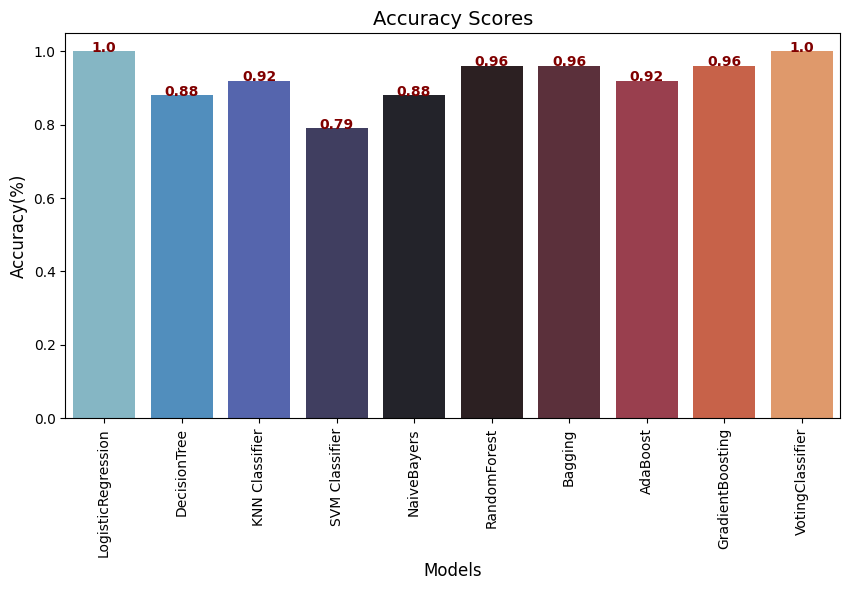

In [117]:
plt.figure(figsize=(10,5))
sns.barplot(x='Models',y='Accuracy(%)',data=scores,palette='icefire')
plt.title('Accuracy Scores',fontsize=14)
plt.xlabel('Models',fontsize=12)
plt.ylabel('Accuracy(%)',fontsize=12)
plt.xticks(rotation=90)
for i,v in enumerate(scores['Accuracy(%)']):
  plt.text(i,v,str(v),ha='center',color='maroon',fontweight='bold')
plt.show()

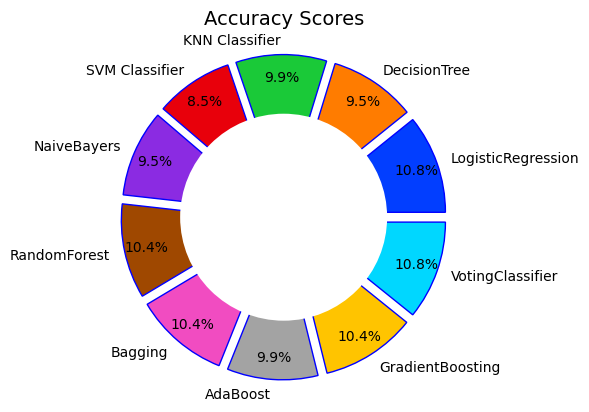

In [118]:
color=sns.color_palette('bright')
plt.pie(scores['Accuracy(%)'],labels=scores['Models'].value_counts().index,autopct='%.1f%%',colors=color,
        explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],wedgeprops=dict(edgecolor='blue'),pctdistance=0.85)
plt.title('Accuracy Scores',fontsize=14)


centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
plt.show()

# **Final Model**

In [119]:
# RandomForest Model is giving good accuracy and other value scores
# So let us consider RandomForest Model for our final model building

In [120]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(criterion='entropy',n_estimators=100,max_features=3,random_state=18) #initialization
rf_model.fit(xtrain,ytrain) #fitting
ypred_rf=rf_model.predict(xtest) #predict

In [121]:
accuracy_rf=round(accuracy_score(ytest,ypred_rf),2)
train_rf=round(rf_model.score(xtrain,ytrain),2)
test_rf=round(rf_model.score(xtest,ytest),2)
print(f'RandomForest Accuracy Score:{accuracy_rf*100}%')
print(f'RandomForest Training Accuracy Score:{train_rf*100}%')
print(f'RandomForest Testing Accuracy Score:{test_rf*100}%')

RandomForest Accuracy Score:96.0%
RandomForest Training Accuracy Score:100.0%
RandomForest Testing Accuracy Score:96.0%


**Final Model Using RandomForest Classifier**

# **Saving Data Using Pickle**

# **Pickle Files**

In [122]:
# Using pickle to save model and data

In [123]:
# saving random forest model

import pickle

pickle_file=open('final_rf_model.pkl',mode='wb')
pickle.dump(rf_model,pickle_file)

In [124]:
# saving tfidf vectorizer model

import pickle

pickle_file1=open('tfidf_model.pkl',mode='wb')
pickle.dump(tfidf,pickle_file1)